Enter a game ID number (or press enter to exit):  99


Retrieving https://www.freetogame.com/api/game?id=99
------------------------------------------------------------
Game Title: Star Crusade
Game Status: Live
Game Description: A free-to-play sci-fi themed collectable card game developed and published by ZiMAD inc. 


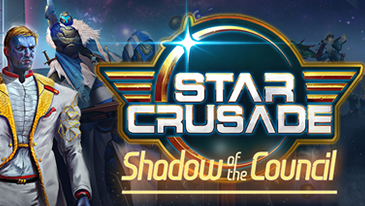

------------------------------------------------------------


Enter a game ID number (or press enter to exit):  


In [9]:
import urllib.request, urllib.parse, urllib.error
from IPython.display import Image, display
import requests
import json

# API base URL
serviceurl = 'https://www.freetogame.com/api/game?id='

while True:
    # Get user input
    keyword_name = input('Enter a game ID number (or press enter to exit): ')
    if len(keyword_name) < 1:  # Break loop if no input
        break

    # Construct the full URL
    url = serviceurl + keyword_name
    print('Retrieving', url)

    try:
        uh = urllib.request.urlopen(url)
        data = uh.read().decode()
        #print('Retrieved', len(data), 'characters')

        # Parse the JSON data
        js = json.loads(data)
    # Check for errors
    except urllib.error.HTTPError as e:
        print(f"HTTP Error: {e.code}")
        continue
    except urllib.error.URLError as e:
        print(f"URL Error: {e.reason}")
        continue
    except json.JSONDecodeError:
        print("Failed to parse JSON")
        continue

    # Print game info
    print("------------------------------------------------------------")
    print("Game Title:", js['title'])
    print("Game Status:", js['status'])
    print("Game Description:", js['short_description'])
    display(Image(requests.get(js['thumbnail']).content))
    print("------------------------------------------------------------")
